In [ ]:
import sys
sys.path.append('../src')

In [2]:
from metrics import calculate_false_alarm, calculate_delay, calculate_precision, compute_metrics
from loading import *
from visualization import *
from features import *
from helpers import *
from filters import *

from matplotlib import pyplot as plt
%matplotlib inline

# Extract metrics for feature according to threshold value

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 2,all_seizures=True, delta=1)

Seizure starts (s):  [[824604.12214844]
 [837451.78589844]]
Seizure ends (s):  [[824690.37769531]
 [837541.65542969]]
Duration (s):  [[86.25554687]
 [89.86953125]]
Sampled frequency (Hz):  512
Start/end [824604.12214844] [824690.37769531]
Start/end [837451.78589844] [837541.65542969]
EEG files:  [['../data/ID02/ID02_229h.mat', '../data/ID02/ID02_230h.mat', '../data/ID02/ID02_231h.mat'], ['../data/ID02/ID02_232h.mat', '../data/ID02/ID02_233h.mat', '../data/ID02/ID02_234h.mat']]
Hour of seizure:  [array([229, 230, 231]), array([232, 233, 234])]
Samples ranges:  [(104510, 148673), (1152914, 1198927)]


In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"] 

In [5]:
max_power_eeg = top_signals(eegs, ranges, top=1, id_seizure = None)

## Convert seizure sample ranges into sliding window ranges

In [6]:
window_size = 128
step_size = 64

In [7]:
indexes = convert_sample_ranges_to_window_ranges(ranges,window_size,step_size,1843200)

# Computing signal energy with window

In [8]:
energy_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_energy, sensor=max_power_eeg[0])

In [9]:
line_length_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_line_length, sensor=max_power_eeg[0])

In [10]:
moving_avg_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_moving_avg, sensor=max_power_eeg[0])

In [11]:
all_data_window_ranges, all_data_energy = merge_all_data(energy_feature_signals, indexes)
all_data_window_ranges, all_data_line_length = merge_all_data(line_length_feature_signals, indexes)
all_data_window_ranges, all_data_moving_avg = merge_all_data(moving_avg_feature_signals, indexes)

## Plotting the results

### Energy feature

time 113497
data 172794


[]

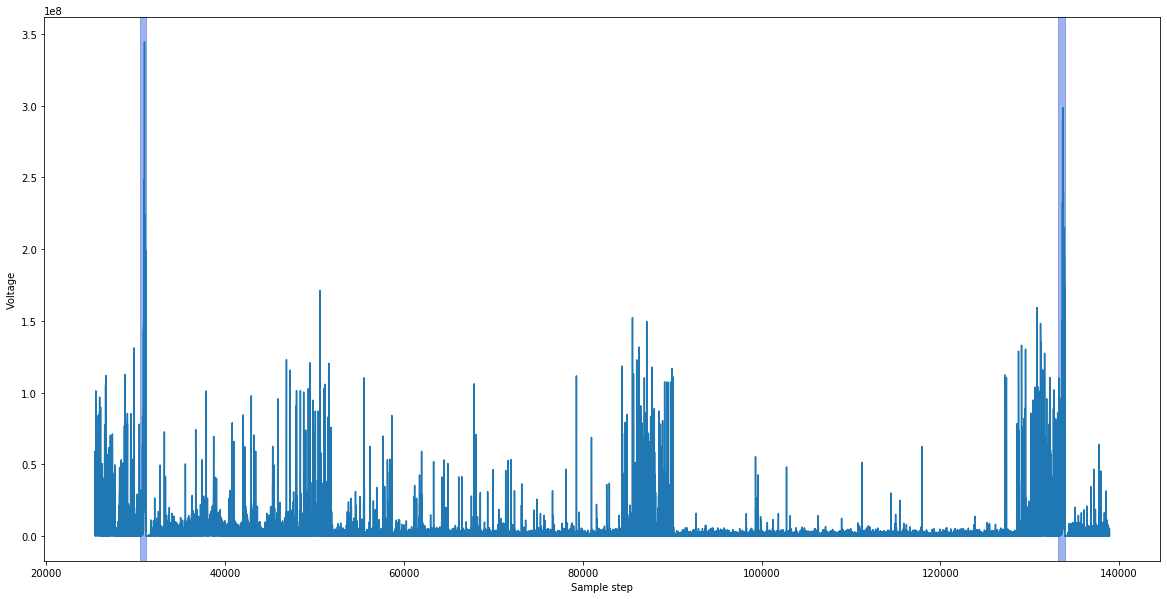

In [12]:
plot_one_signal(all_data_energy , all_data_window_ranges, 10000)

### Line length feature

time 113497
data 172794


[]

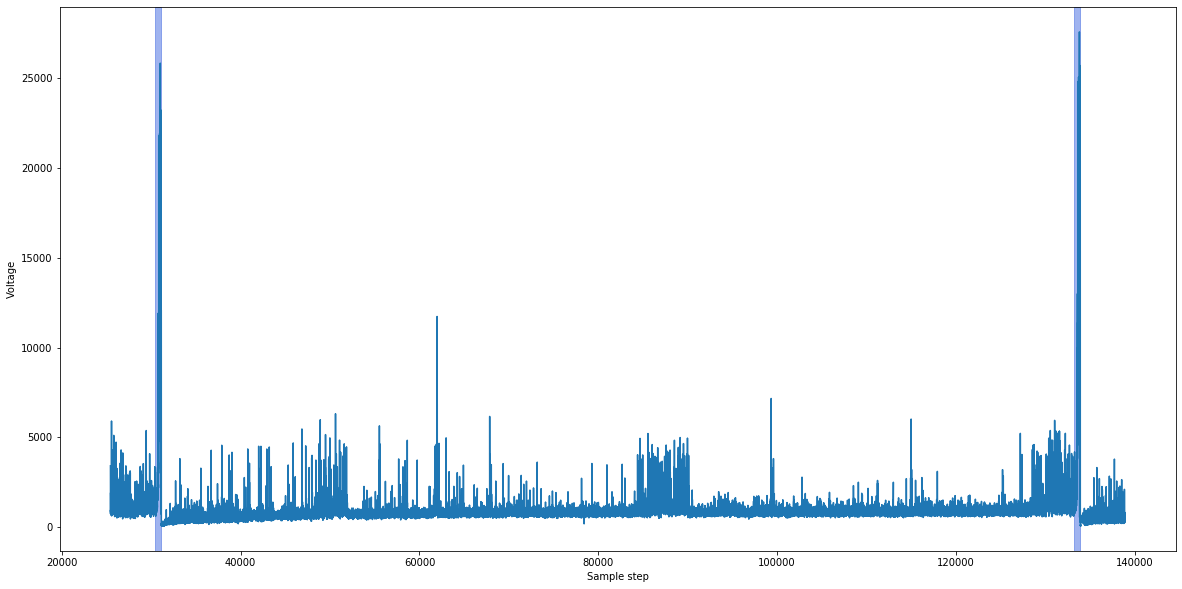

In [13]:
plot_one_signal(all_data_line_length , all_data_window_ranges, 10000)

### Moving AVG feature

time 113497
data 172794


[]

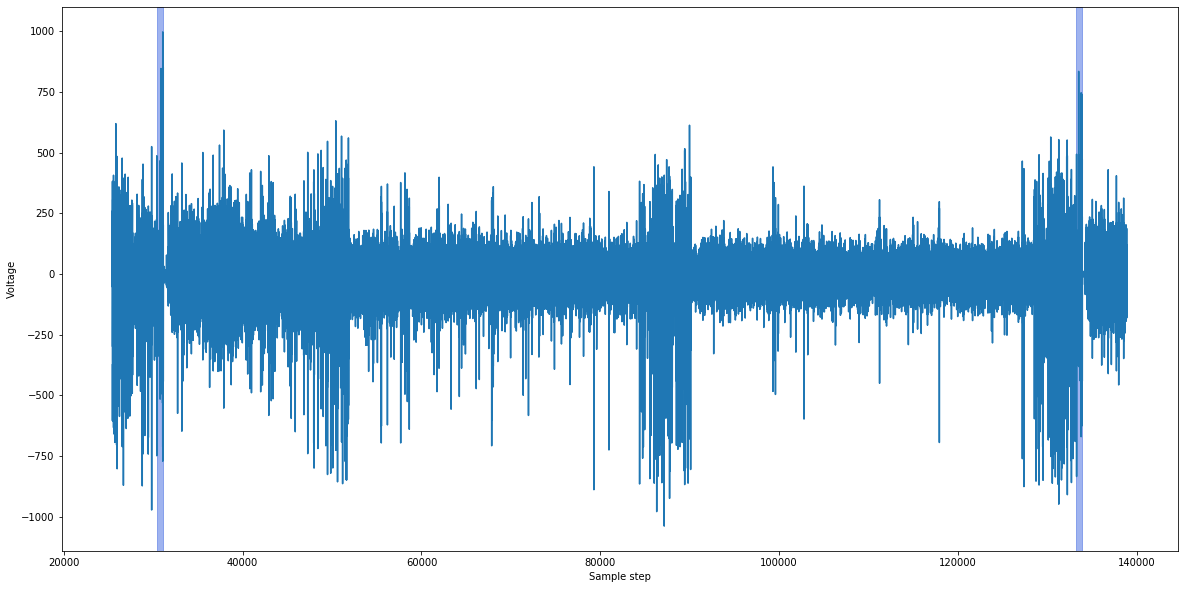

In [14]:
plot_one_signal(all_data_moving_avg , all_data_window_ranges, 10000)

# Plotting real signal and computed energy signal

In [15]:
energy_seizure1_single = energy_feature_signals[0][1]
energy_seizure1_single_scaled = scale_signal(energy_seizure1_single, 128, 64)

In [16]:
line_length_seizure1_single = line_length_feature_signals[0][1]
line_length_seizure1_single_scaled = scale_signal(line_length_seizure1_single, 128, 64)

In [17]:
moving_avg_seizure1_single = moving_avg_feature_signals[0][1]
moving_avg_seizure1_single_scaled = scale_signal(moving_avg_seizure1_single, 128, 64)

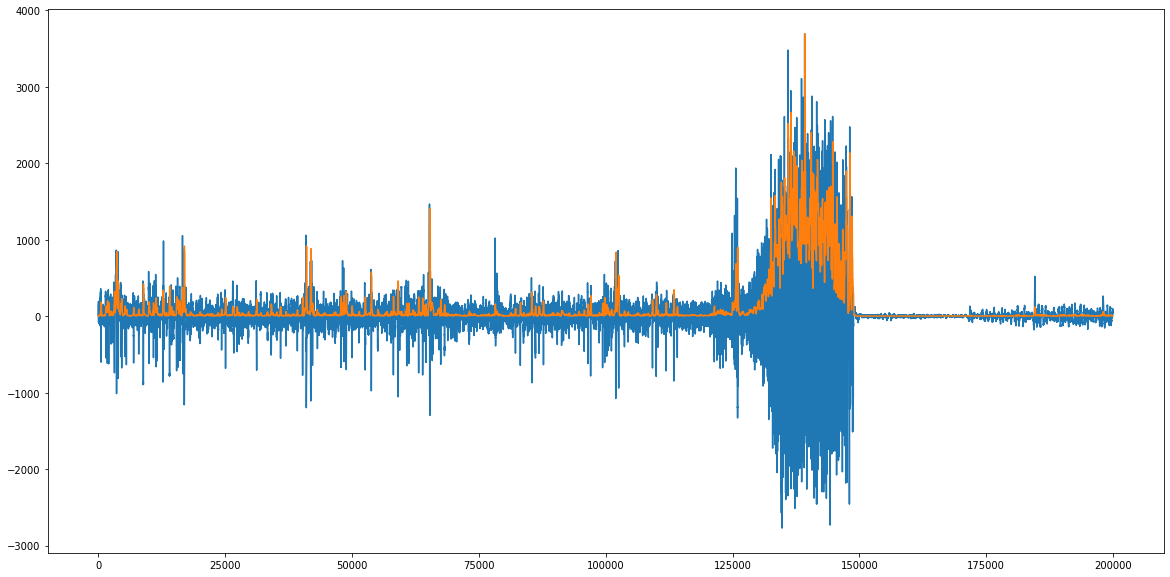

In [18]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:200000])
plt.plot(energy_seizure1_single_scaled[:200000]/np.max(energy_seizure1_single_scaled)*np.max(real_signal))

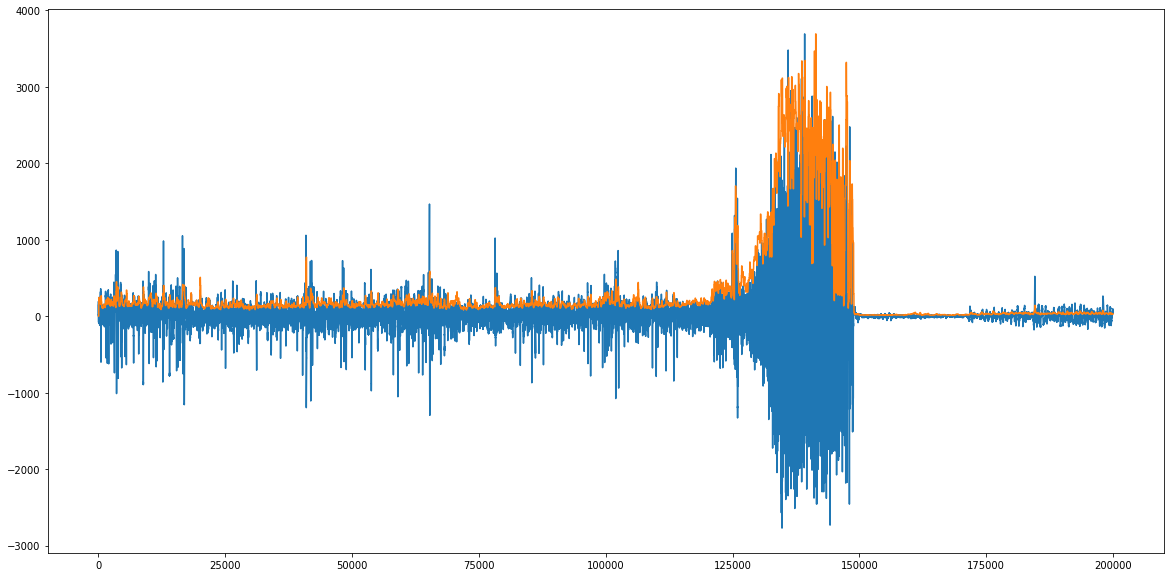

In [19]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:200000])
plt.plot(line_length_seizure1_single_scaled[:200000]/np.max(line_length_seizure1_single_scaled)*np.max(real_signal))

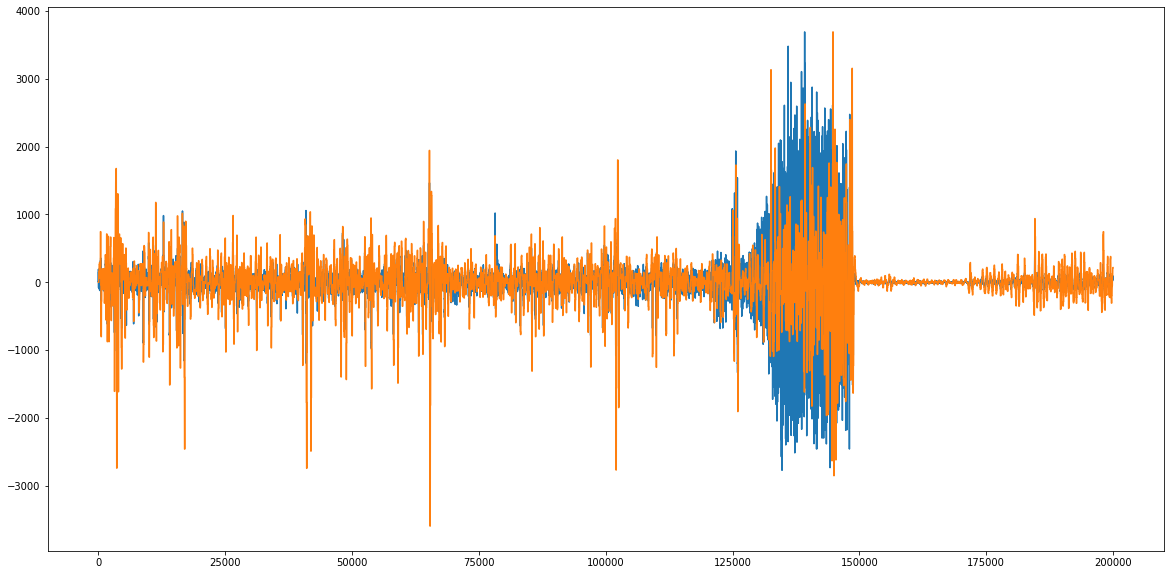

In [20]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:200000])
plt.plot(moving_avg_seizure1_single_scaled[:200000]/np.max(moving_avg_seizure1_single_scaled)*np.max(real_signal))

# Computing filterd signals features

## Signal filtering

In [21]:
filtered_signals = calculate_filtered_signal(eegs, 128, 250, sensor=max_power_eeg[0], ftype='fir', fs=512.0 ,order=15)

In [22]:
energy_feature_filtered_signals = calculate_feature(filtered_signals, window_size, step_size, calculate_energy)

In [23]:
line_length_feature_filtered_signals = calculate_feature(filtered_signals, window_size, step_size, calculate_line_length)

In [24]:
moving_avg_feature_filtered_signals = calculate_feature(filtered_signals, window_size, step_size, calculate_moving_avg)

In [25]:
_, all_filtered_data_energy = merge_all_data(energy_feature_filtered_signals, indexes)
_, all_filtered_data_line_length = merge_all_data(line_length_feature_filtered_signals, indexes)
_, all_filtered_data_moving_avg = merge_all_data(moving_avg_feature_filtered_signals, indexes)

# Plotting filtered signal and computed features signals

In [26]:
energy_filtered_seizure1_single = energy_feature_filtered_signals[0][1]
energy_filtered_seizure1_single_scaled = scale_signal(energy_filtered_seizure1_single, 128, 64)

In [27]:
line_length_filtered_seizure1_single = line_length_feature_filtered_signals[0][1]
line_length_filtered_seizure1_single_scaled = scale_signal(line_length_filtered_seizure1_single, 128, 64)

In [28]:
moving_avg_filtered_seizure1_single = moving_avg_feature_filtered_signals[0][1]
moving_avg_filtered_seizure1_single_scaled = scale_signal(moving_avg_filtered_seizure1_single, 128, 64)

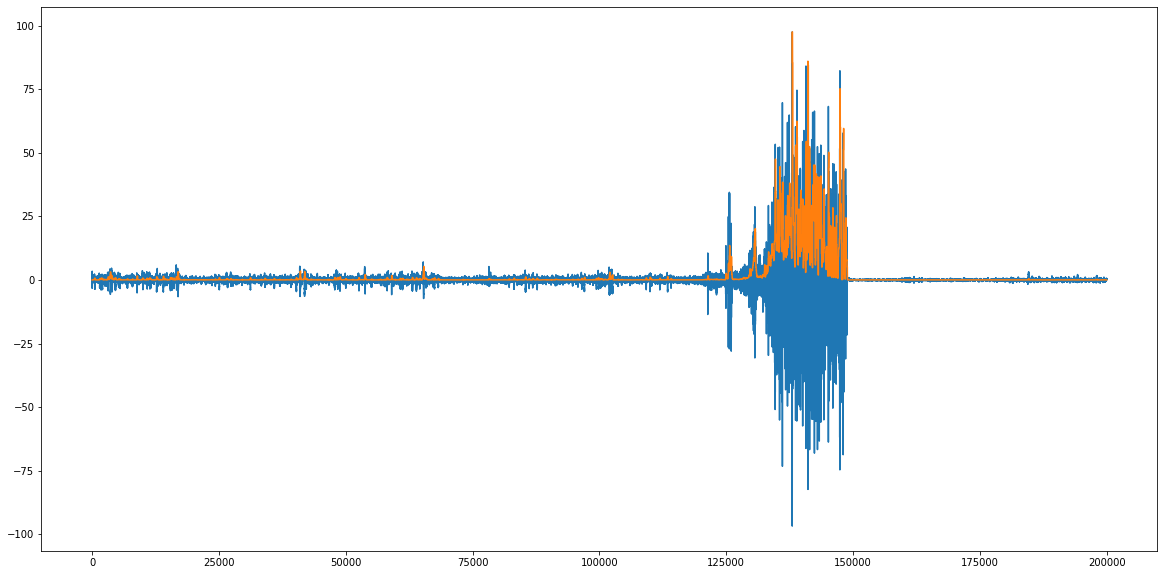

In [29]:
plt.figure(figsize=(20,10))
real_signal = filtered_signals[0][1]
plt.plot(real_signal[:200000])
plt.plot(energy_filtered_seizure1_single_scaled[:200000]/np.max(energy_filtered_seizure1_single_scaled)*np.max(real_signal))

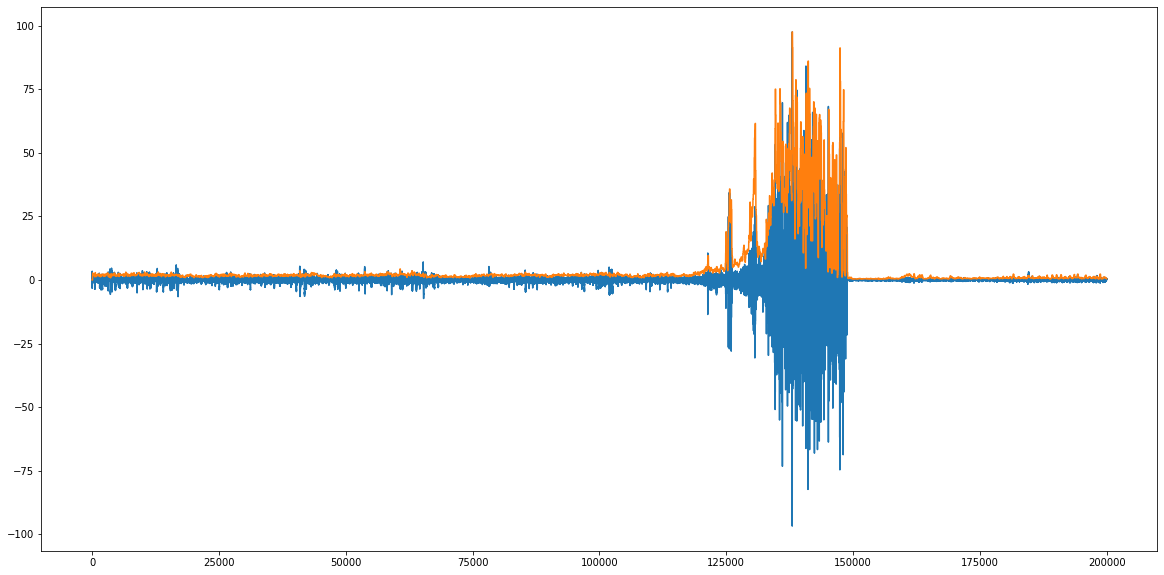

In [30]:
plt.figure(figsize=(20,10))
real_signal = filtered_signals[0][1]
plt.plot(real_signal[:200000])
plt.plot(line_length_filtered_seizure1_single_scaled[:200000]/np.max(line_length_filtered_seizure1_single_scaled)*np.max(real_signal))

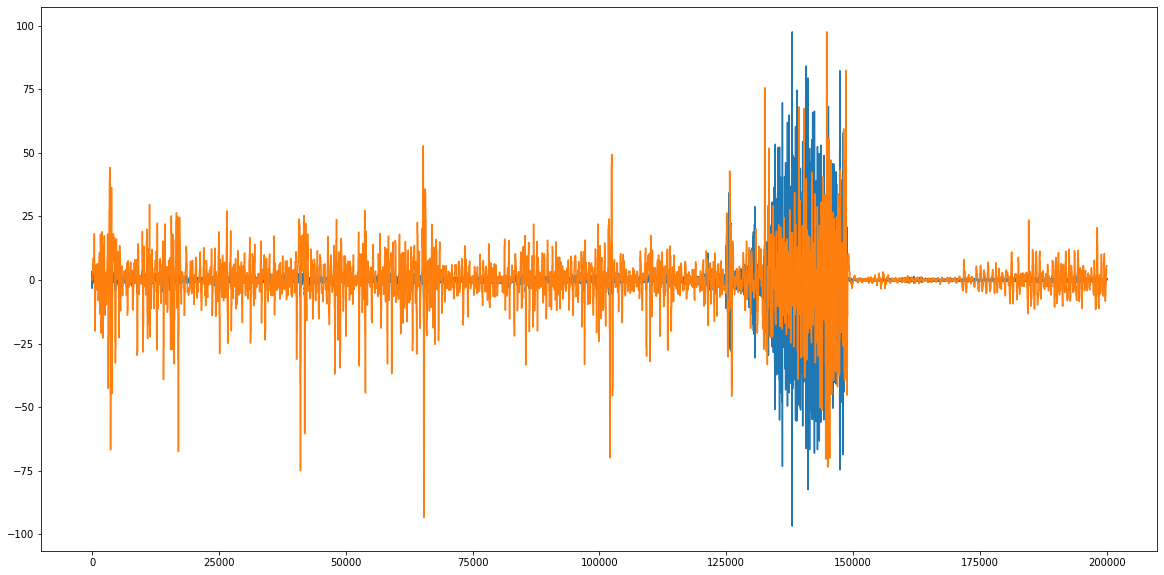

In [31]:
plt.figure(figsize=(20,10))
real_signal = filtered_signals[0][1]
plt.plot(real_signal[:200000])
plt.plot(moving_avg_filtered_seizure1_single_scaled[:200000]/np.max(moving_avg_filtered_seizure1_single_scaled)*np.max(real_signal))

# Calculate metrics according to the threshold value

In [32]:
thresholds, false_alarms_energy, delays_energy, precisions_energy = compute_metrics(all_data_energy, all_data_window_ranges, window_size, step_size)

In [33]:
_, false_alarms_line_length, delays_line_length, precisions_line_length = compute_metrics(all_data_line_length, all_data_window_ranges, window_size, step_size)

In [34]:
_, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg = compute_metrics(all_data_moving_avg, all_data_window_ranges, window_size, step_size)

In [35]:
_, false_alarms_energy_f, delays_energy_f, precisions_energy_f = compute_metrics(all_filtered_data_energy, all_data_window_ranges, window_size, step_size)

In [36]:
_, false_alarms_line_length_f, delays_line_length_f, precisions_line_length_f = compute_metrics(all_filtered_data_line_length, all_data_window_ranges, window_size, step_size)

In [37]:
_, false_alarms_moving_avg_f, delays_moving_avg_f, precisions_moving_avg_f = compute_metrics(all_filtered_data_moving_avg, all_data_window_ranges, window_size, step_size)

# Scores without filtering

## Energy feature

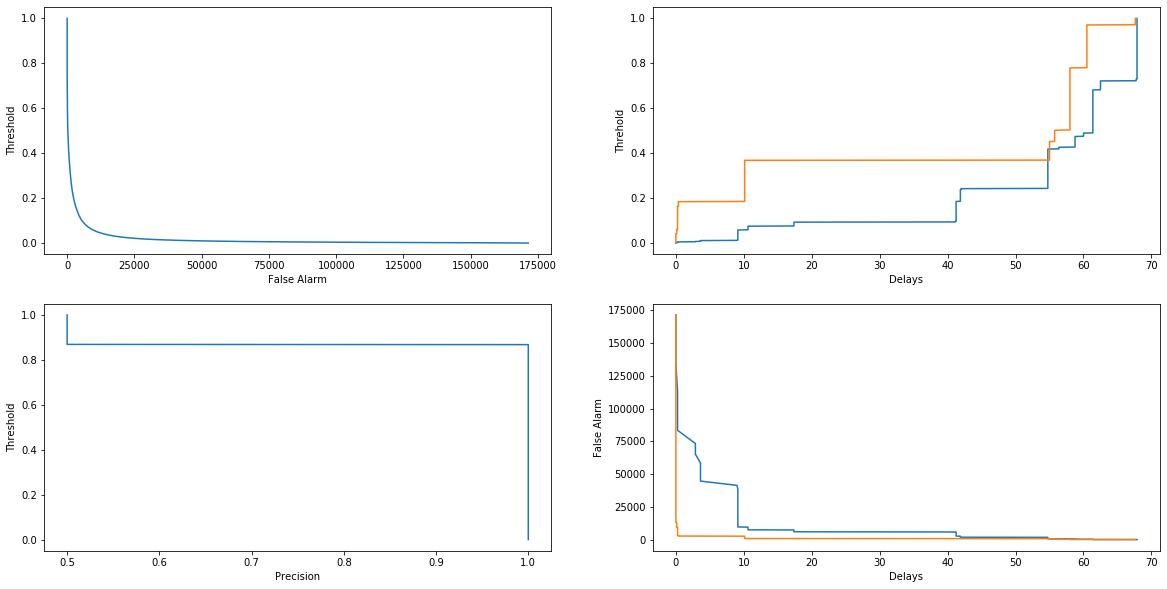

In [38]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_energy, delays_energy, precisions_energy)

In [39]:
weights = (1,1,1)

In [40]:
scores_energy  = compute_score_on_seizures(thresholds, false_alarms_energy, precisions_energy, delays_energy, weights)

Max score for seizure 0 is 0.9895441972780928 for t=0.058
FA: 9636
Delay: 9.125316851279559
Precision: 1.0

Max score for seizure 1 is 0.9998573218155242 for t=0.184
FA: 2683
Delay: 0.3750130212854613
Precision: 1.0



In [41]:
overall_scores_energy = compute_overall_score(scores_energy)

Distance score 0.06321068054080056
Averaged seizures score 0.9947007595468085
Overall score 15.736276702554397


## Line length feature

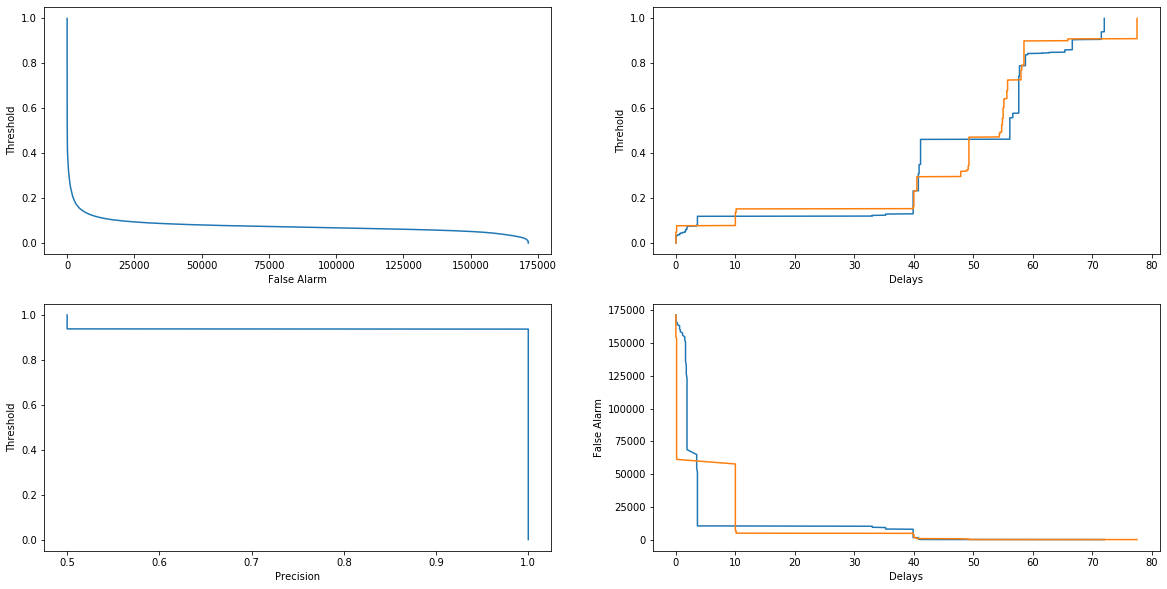

In [42]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_line_length, delays_line_length, precisions_line_length)

In [43]:
scores_line_length = compute_score_on_seizures(thresholds, false_alarms_line_length, precisions_line_length, delays_line_length, weights)

Max score for seizure 0 is 0.9970587452882923 for t=0.11900000000000001
FA: 10441
Delay: 3.6251258724261257
Precision: 1.0

Max score for seizure 1 is 0.9417933279954661 for t=0.077
FA: 61177
Delay: 0.1250043404284871
Precision: 1.0



In [44]:
overall_scores_line_length = compute_overall_score(scores_line_length)

Distance score 0.034706866570428874
Averaged seizures score 0.9694260366418792
Overall score 27.931822501886547


## Moving AVG feature

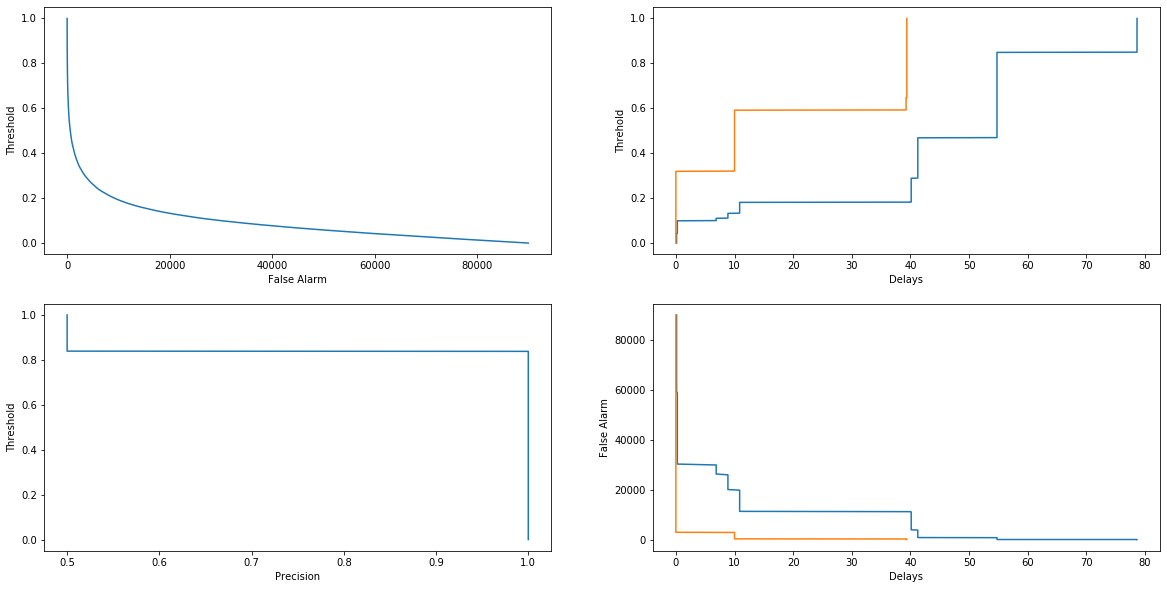

In [45]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg)

In [46]:
scores_moving_avg = compute_score_on_seizures(thresholds, false_alarms_moving_avg, precisions_moving_avg, delays_moving_avg, weights)

Max score for seizure 0 is 0.9702170052844147 for t=0.132
FA: 20034
Delay: 8.875308170422585
Precision: 1.0

Max score for seizure 1 is 0.9994679607908694 for t=0.319
FA: 2923
Delay: 0.0
Precision: 1.0



In [47]:
overall_scores_moving_avg = compute_overall_score(scores_moving_avg)

Distance score 0.09463696212109805
Averaged seizures score 0.9848424830376421
Overall score 10.40653103147406


# Scores filtering

## Energy feature (with filtering)

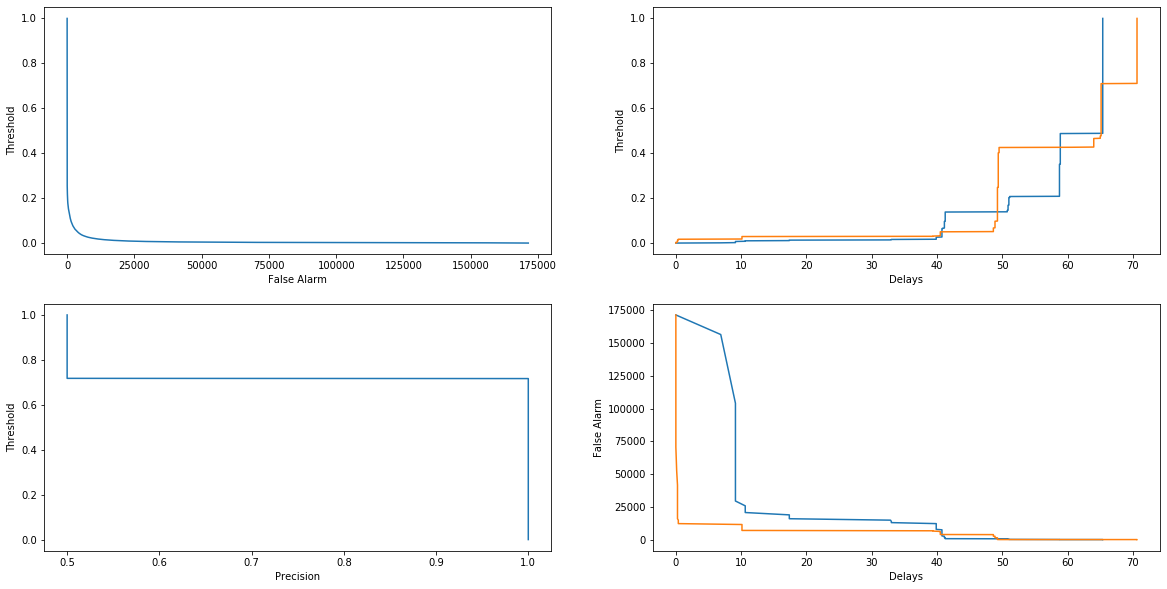

In [48]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_energy_f, delays_energy_f, precisions_energy_f)

In [49]:
weights = (1,1,1)

In [50]:
scores_energy_f  = compute_score_on_seizures(thresholds, false_alarms_energy_f, precisions_energy_f, delays_energy_f, weights)

Max score for seizure 0 is 0.9776842725929772 for t=0.007
FA: 29421
Delay: 9.125316851279559
Precision: 1.0

Max score for seizure 1 is 0.9974685006754251 for t=0.017
FA: 12173
Delay: 0.3750130212854613
Precision: 1.0



In [51]:
overall_scores_energy_f = compute_overall_score(scores_energy_f)

Distance score 0.011083948764072331
Averaged seizures score 0.9875763866342011
Overall score 89.09968889745731


## Line length feature (with filtering)

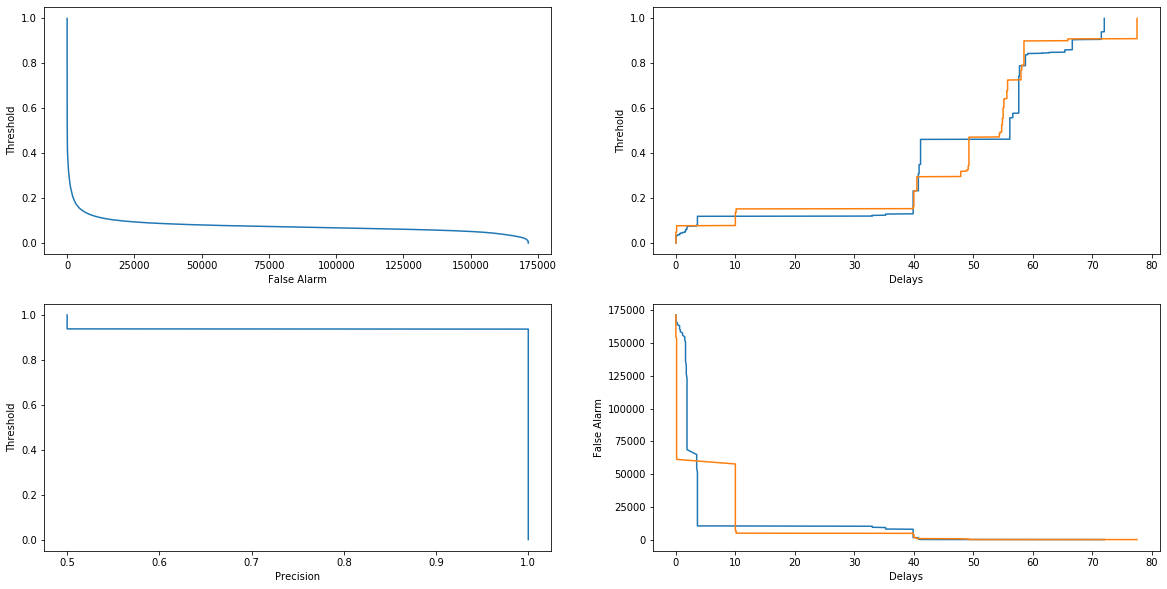

In [52]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_line_length, delays_line_length, precisions_line_length)

In [53]:
scores_line_length_f = compute_score_on_seizures(thresholds, false_alarms_line_length_f, precisions_line_length_f, delays_line_length_f, weights)

Max score for seizure 0 is 0.7580178334989125 for t=0.025
FA: 146776
Delay: 5.875204000138893
Precision: 1.0

Max score for seizure 1 is 0.7500757882740318 for t=0.023
FA: 150466
Delay: 5.750199659710407
Precision: 1.0



In [54]:
overall_scores_line_length_f = compute_overall_score(scores_line_length_f)

Distance score 0.004094999461356829
Averaged seizures score 0.7540468108864722
Overall score 184.13843957787185


## Moving AVG feature (with filtering)

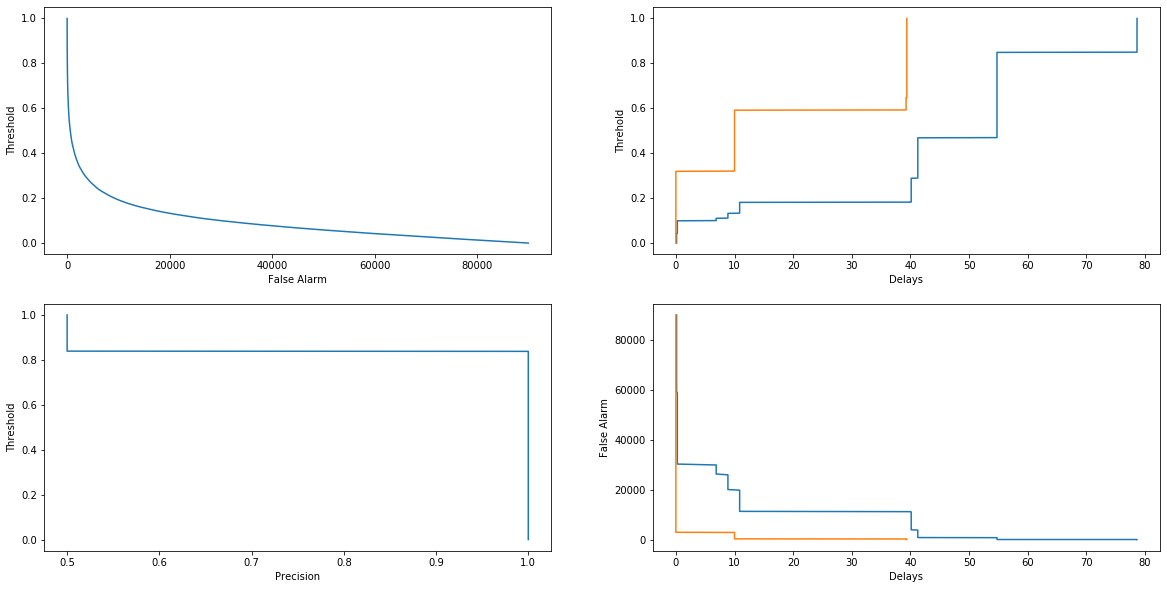

In [55]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg)

In [56]:
scores_moving_avg_f = compute_score_on_seizures(thresholds, false_alarms_moving_avg_f, precisions_moving_avg_f, delays_moving_avg_f, weights)

Max score for seizure 0 is 0.9681534456128724 for t=0.128
FA: 20913
Delay: 8.875308170422585
Precision: 1.0

Max score for seizure 1 is 0.9988886526063742 for t=0.279
FA: 4233
Delay: 0.0
Precision: 1.0



In [57]:
overall_scores_moving_avg_f = compute_overall_score(scores_moving_avg_f)

Distance score 0.07704812286638364
Averaged seizures score 0.9835210491096233
Overall score 12.765022852214573


# Observations

In [58]:
print("Scores without filtering")
print("Energy :", overall_scores_energy)
print("Line length :", overall_scores_line_length)
print("Moving Average :", overall_scores_moving_avg)

Scores without filtering
Energy : 15.736276702554397
Line length : 27.931822501886547
Moving Average : 10.40653103147406


In [59]:
print("Scores with filtering (bandpass from 128Hz to 250Hz)")
print("Energy :", overall_scores_energy_f)
print("Line length :", overall_scores_line_length_f)
print("Moving Average :", overall_scores_moving_avg_f)

Scores with filtering (bandpass from 128Hz to 250Hz)
Energy : 89.09968889745731
Line length : 184.13843957787185
Moving Average : 12.765022852214573
